In [1]:
from dtype.datasets import *
from dtype.sorters.rule_sorter.rule_sorter import RuleSorter
from dtype.sorters import *
from dtype.metrics import *
from utils.drawer import *

### Подсчет всех метрик для всех комбинаций сортировок и датасетов

In [2]:
datasets ={ "ExampleDataset":ExampleDataset(),
          }
sorters ={ "TriangularSorter":TriangularSorter(),
          "Rule_sorter" : RuleSorter(),
          }
metrics = {
    "FullMatchPrecision":FullMatchPrecision(),
}

for name_sorter, sorter in sorters.items():
    print("="*10, name_sorter, "="*10)
    for name_dataset, dataset in datasets.items():
        print("*"*5, name_dataset, "*"*5)
        for name_metric, metric in metrics.items():
            print(name_metric, f':\t{metric.compute(dataset, sorter):.4f}')

========== TriangularSorter ==========
***** ExampleDataset *****
FullMatchPrecision :	0.2500
========== Rule_sorter ==========
***** ExampleDataset *****


TypeError: 'bool' object is not callable

### Конкретный пример

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..225.0].


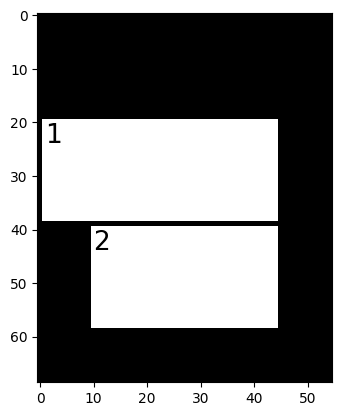

TypeError: 'bool' object is not callable

In [ ]:
page = datasets["ExampleDataset"].pages[1]
sorter = sorters["Rule_sorter"]
Drawer.draw_bbox(page.bboxes, list(map(str, [1, 2])))

inds = sorter.sort(page)
true_inds = [page.true_reading_order[bbox.id] for bbox in page.bboxes]
print("pred_inds:", inds)
print("true_inds:", true_inds)